# 10 - Hypothesis Testing

## Introduction to Hypothesis Testing
**Hypothesis testing** is a fundamental statistical method used to make inferences about population parameters based on sample data. It allows us to assess whether any observed differences or effects in data are statistically significant or simply due to chance.

### Real-World Applications
Before diving into the technical details, here are a few real-world scenarios where hypothesis testing plays a critical role.

- **A/B Testing**: Used in marketing and product development to evaluate if changes (e.g., new features or designs) lead to improved performance or user engagement.

- **Medical Research**: Essential for determining whether a new treatment or drug has a statistically significant effect on patient outcomes.

- **Machine Learning**: Applied to compare model performance or to test assumptions in feature selection or statistical learning techniques.

## Basic Framework
Hypothesis tests typically include four parts,

#### **1. Define the hypothesis**

- **Null Hypothesis** ($H_0$): The null hypothesis is a statement that there is no significant difference, effect, or relationship in the population.

- **Alternative Hypothesis** ($H_1$ or $H_a$): The alternative hypothesis is the statement we are testing. It suggests that there is a significant difference, effect, or relationship in the population.

As an example, suppose we have the following data for heights from a sample of 4 adults from Chicago, and 4 adults from Atlanta.


In [2]:
import pandas as pd

chicago_heights = [183.0687026 , 186.70644354, 173.26657415, 179.03252868]

atlanta_heights = [167.5102584 , 177.81241131, 187.13298753, 175.29871173]

df = pd.DataFrame({
    'Chicago Heights': chicago_heights,
    'Atlanta Heights': atlanta_heights
    })

df

,Chicago Heights,Atlanta Heights
0,183.068703,167.510258
1,186.706444,177.812411
2,173.266574,187.132988
3,179.032529,175.298712


Lets start by looking at some basic statistics.

In [3]:
df.describe()

,Chicago Heights,Atlanta Heights
count,4.000000,4.000000
mean,180.518562,176.938592
std,5.761733,8.088509
min,173.266574,167.510258
25%,177.591040,173.351598
50%,181.050616,176.555562
75%,183.978138,180.142555
max,186.706444,187.132988


Which city has taller people? Well we can look at the means, but is this difference **significant**? 

It looks like Chicago has taller adults on average, but only by about 3cm. Is that enough to be sure? What if we just happened to sample shorter people when measuring Atlanta adults by accident?

In [4]:
df.mean()

Chicago Heights    180.518562
Atlanta Heights    176.938592
dtype: float64

It's hard to note if this difference in heights is due to random chance in our experiment, or if it is truly reflective of the heights of adults in these two cities. What we can do to answer this is build a two-sample hypothesis test.

The first part of any significance test is to define our **null hypothesis**, $H_0$. This is typically a statement that is are no difference between the two groups of data. We usually want to try to prove the null hypothesis wrong with our test.

$$H_0: \text{There is no difference in the mean height of adults from Chicago and Atlanta}$$
$$\mu_1 = \mu_2~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$$

where:

- $\mu_1$ is the mean height of adults from Chicago

- $\mu_2$ is the mean height of adults from Atlanta

We also define our **alternative hypothesis**, $H_1$. This is usually the research question we wish to prove true, it contrasts the null hypothesis.

$$H_1: \text{The mean height of adults from Chicago is greater than those from Atlanta}$$
$$\mu_1 > \mu_2~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$$

#### **2. Set the significance level**

We will want to generate something called a **p-value** (more on this later) and compare it to a **significance level**, $\alpha$. 

The significance level is the threshold used to determine whether to reject the null hypothesis. It is common to use $\alpha = 0.05$ of $5\%$.

#### **3. Run a Hypothesis Test**
We will actually try to use the data to simulate what our experiment could look like if $H_0$ were true. We will do this simulation manually, but in practice you can use an already existing function or test.

We can create a statistic for our test as we are doing this significance test manually at the moment, this will be the **difference in the means**.

In [5]:
observed_mean_diff = df['Chicago Heights'].mean() - df['Atlanta Heights'].mean()
observed_mean_diff

3.579970000000003

We can plot our two samples.

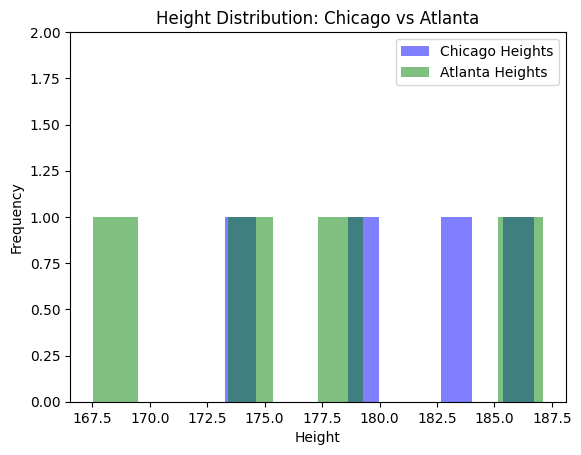

In [6]:
import matplotlib.pyplot as plt

# Combine both histograms into one plot
plt.hist(chicago_heights, bins=10, color='blue', alpha=0.5, label='Chicago Heights')
plt.hist(atlanta_heights, bins=10, color='green', alpha=0.5, label='Atlanta Heights')

# Add lines for means
# plt.axvline(df['Chicago Heights'].mean(), color='blue', linestyle='dashed', linewidth=1, label='Chicago Mean')
# plt.axvline(df['Atlanta Heights'].mean(), color='green', linestyle='dashed', linewidth=1, label='Atlanta Mean')

# Add labels and title
plt.title('Height Distribution: Chicago vs Atlanta')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.ylim(0, 2)
plt.legend()

# Show the plot
plt.show()

Because we are manually building a statistical significance test, we will **simulate** the **null hypothesis**. Recall,

$$H_0: \text{There is no difference in the mean height of adults from Chicago and Atlanta}$$
$$\mu_1 = \mu_2~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$$

where:

- $\mu_1$ is the mean height of adults from Chicago

- $\mu_2$ is the mean height of adults from Atlanta

If $H_0$ were true, then there is no difference between Chicago and Atlanta data, that means we could pool together the data and treat Chicago data and Atlanta data the same.

In [60]:
import numpy as np

data_assuming_null = np.concatenate([chicago_heights, atlanta_heights])
data_assuming_null

array([183.0687026 , 186.70644354, 173.26657415, 179.03252868,
       167.5102584 , 177.81241131, 187.13298753, 175.29871173])

Now we can test if the difference in heights we saw earlier was due to random chance in selecting our adults, or if it may have been caused by a true difference in heights between the two cities.

By assuming $H_0$ to be true, we pool the data together. Then, we will re-sample 4 new "Chicagoans" from our pooled-together (null) sample. But these "Chicagoans" may be from either Chicago or Atlanta. We'll do the same for Atlanta, and re-sample 4 new "Atlantans" from our pooled-together (null) sample.

We'll then measure the difference in the means between the 4 new "Chicagoans" and 4 new "Atlantans". Because we are assuming the null hypothesis is true, then there should be no difference in heights between a Chicagoan and an Atlantan. 

In [61]:
def resample_data(X):
    simulated_X1 = np.random.choice(X, size=4)
    simulated_X2 = np.random.choice(X, size=4)
    return simulated_X1, simulated_X2

def test_statistic(x1, x2):
    return x1.mean() - x2.mean()

In [62]:
# We mix together Chicago and Atlanta data, and then randomly pull 4 people and label them as
# Chicagoans, and randomly pull 4 other people and label them as Atlantans
simulated_chicago_data, simulated_atlanta_data = resample_data(data_assuming_null)
print(f"Heights of simulated 'Chicagoans': {simulated_chicago_data}") # Our re-sampled list of "Chicagoans" 
print()
print(f"Heights of simulated 'Atlantans': {simulated_atlanta_data}") # Our re-sampled list of "Atlantans" 

Heights of simulated 'Chicagoans': [177.81241131 175.29871173 187.13298753 183.0687026 ]

Heights of simulated 'Atlantans': [183.0687026  173.26657415 179.03252868 187.13298753]


In [63]:
# Find the difference in means of the two new groups
simulated_mean_difference = test_statistic(simulated_chicago_data, simulated_atlanta_data)
simulated_mean_difference

0.20300505250000356

Compare this to our observed difference of means

In [64]:
observed_mean_diff

3.579970000000003

This allows us to re-perform our experiment, but under the assumption that there shouldn't be a difference between Chicagoans and Atlatans in their heights.

This let's us focus on the following question: "Assuming there is no difference in height between the cities, how would random chance in selecting four participants impact our measurements."

In [65]:
list_sim_mean_diff = []

n = 0

List of simulated mean differences: [-0.8999977874999843]


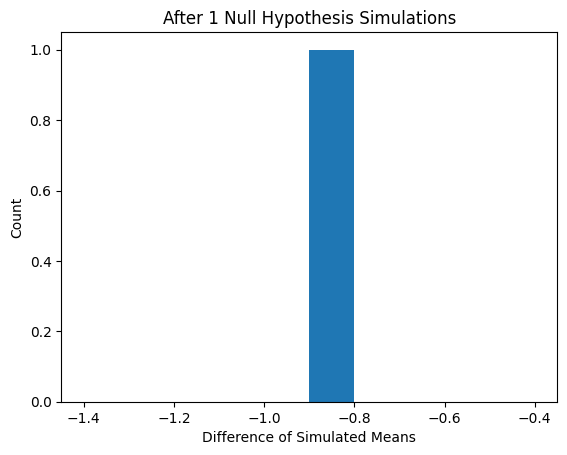

In [66]:
simulated_chicago_data, simulated_atlanta_data = resample_data(data_assuming_null)

simulated_mean_difference = test_statistic(simulated_chicago_data, simulated_atlanta_data)

list_sim_mean_diff.append(simulated_mean_difference)

print(f"List of simulated mean differences: {list_sim_mean_diff}")

n += 1

plt.hist(list_sim_mean_diff)
plt.title(f'After {n} Null Hypothesis Simulations')
plt.xlabel('Difference of Simulated Means')
plt.ylabel('Count')
plt.show()

Lets do even more simulations.

In [67]:
list_sim_mean_diff = []

n = 0

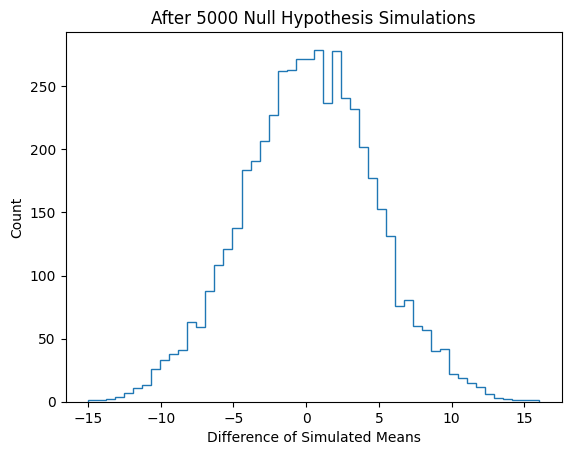

In [68]:
for _ in range(5000):
    
    simulated_chicago_data, simulated_atlanta_data = resample_data(data_assuming_null)

    simulated_mean_difference = test_statistic(simulated_chicago_data, simulated_atlanta_data)

    list_sim_mean_diff.append(simulated_mean_difference)
    
    n += 1
    
plt.hist(list_sim_mean_diff, bins=50, histtype='step')
plt.title(f'After {n} Null Hypothesis Simulations')
plt.xlabel('Difference of Simulated Means')
plt.ylabel('Count')
plt.show()

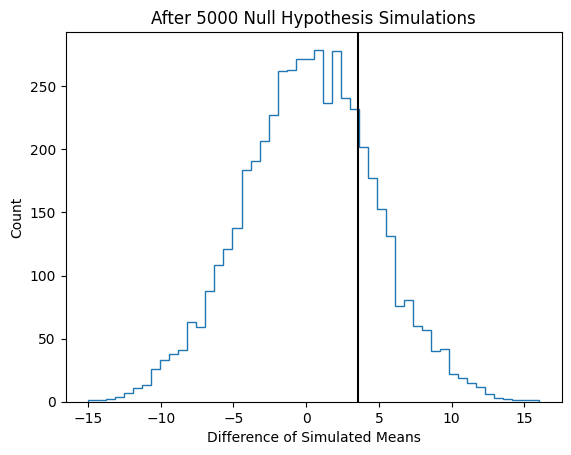

In [69]:
plt.hist(list_sim_mean_diff, bins=50, histtype='step')
plt.axvline(observed_mean_diff, c='k', label='Observed Diff. of Means')
plt.title(f'After {n} Null Hypothesis Simulations')
plt.xlabel('Difference of Simulated Means')
plt.ylabel('Count')
plt.show()

In [70]:
sim_mean_diff_less_obs = sum(list_sim_mean_diff > observed_mean_diff)

p_value = sim_mean_diff_less_obs/len(list_sim_mean_diff)

print(f"In our dataset, we observed a difference of the means of {observed_mean_diff:.4f}")
print()

print(f'Out of all {len(list_sim_mean_diff)} simulated null samples, {sim_mean_diff_less_obs} have mean differences greater than the true observed mean difference')
print()
print(f"That's a fraction of {p_value:4f} or {p_value*100:.3f}%")
print()
print(f"This is also our simulated p-value, {p_value:4f}")

In our dataset, we observed a difference of the means of 3.5800

Out of all 5000 simulated null samples, 1114 have mean differences greater than the true observed mean difference

That's a fraction of 0.222800 or 22.280%

This is also our simulated p-value, 0.222800


The **p-value** tell us, assuming our **null hypothesis** that both samples are actually the same were true, what the probability would be of getting the metric (difference in means) that we observed.

This is a bootstrap approaching to estimating the p-value. It is non-parametric, meaning it doesn't assume any distribution for the data. It is data-driven because we use the data to generate simulated samples. In the later section, we will introduce some common signficance tests.

#### **4. Make a Decision**
If the p-value is low (typically below the chosen significance level, such as 0.05), it suggests that the observed metric (in this case, the mean difference) is unlikely to have occurred under the assumption of the null hypothesis. This provides evidence against the null hypothesis, and we reject it.

If the p-value is high (greater than the significance level), it suggests that the observed metric is reasonably likely to have occurred under the assumption of the null hypothesis. This doesn't provide strong evidence against the null hypothesis, so we fail to reject it.

In general,

$$\text{If p-value } \lt \alpha \text{ we reject } H_0$$

$$\text{If p-value } \ge \alpha \text{ we fail to reject } H_0$$

Given a $\alpha =$ 0.05 significance level, do we reject our null hypothesis, or state there is evidence for the null hypothesis being true? Recall our $H_0$,

$$H_0: \text{There is no difference in the mean height of adults from Chicago and Atlanta}$$
$$\mu_1 = \mu_2~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$$


In [71]:
p_value

0.2228

Because $\text{p-value } \ge \alpha$, you would fail to reject the null hypothesis. In other words, you don't have sufficient evidence to conclude that the mean height of adults from Chicago is greater than those from Atlanta.

## Common Significance Tests
In practice, a signficance test is easier to implement than this. You don't have to do a non-parametric bootstrap, and in practice the above can have its limits. Depending on what you are testing.

<p align="center">
  <img src="imgs/common_tests.png" alt="Alt text" width="950" height="250">
</p>

## T-Test
T-tests are statistical tests used to determine if there are significant differences between the means of one or two groups. 

- Widely used when the sample size is small ($n \leq 30$) and the population standard deviation is unknown. 
    
- Can be categorized based on the number of samples being compared: **one-sample**, **two-sample**, and **paired t-tests**.

### Types of T-Tests
In hypothesis testing, researchers often encounter situations where they need to compare a sample to a known value or compare two independent samples. **One-sample** and **two-sample** tests are fundamental tools in statistics for addressing these types of research questions.

#### One-Sample Test
A **one-sample test** is used to determine whether the mean of a single sample differs significantly from a known value or a hypothesized population mean. This type of test is commonly used when researchers want to assess whether a sample comes from a population with a specific characteristic.

**Example Research Question:** Is the average weight of apples harvested from a farm different from 150 grams?

##### Steps in Conducting a One-Sample Test:
1. **Formulate Hypotheses**: Define the null and alternative hypotheses based on the research question. For a one-sample test, the null hypothesis typically states that the sample mean is equal to the hypothesized population mean.

$$H_0: \mu = 150\text{g } \text{  (The average weight of apples harvested from a farm is equal to 150 grams)}~~~~~~~$$

$$H_a: \mu \ne 150\text{g } \text{  (The average weight of apples harvested from a farm is not equal to 150 grams)}$$

2. **Choose a Significance Level**: Determine the significance level (commonly $\alpha = 0.5$)

3. **Collect Data**: Gather data from the sample.

In [78]:
# Let's say the harvest included 10 apples with the following weights (in grams)
sample_weights = [137, 159, 143, 158, 144, 170, 161, 169, 140, 139]
sample_mean = np.mean(sample_weights)
print(f"Sample Weights: {sample_weights}")
print(f"Sample Mean: {sample_mean}")

Sample Weights: [137, 159, 143, 158, 144, 170, 161, 169, 140, 139]
Sample Mean: 152.0


4. **Perform the Test**: Calculate the test statistic (e.g., t-statistic) and the p-value. 

    - We use `scipy.stats.ttest_1samp` to perform the one-sample t-test, comparing the sample weights to the hypothesized mean.

In [79]:
from scipy.stats import ttest_1samp

# Hypothesized population mean
hypothesized_pop_mean = 150

# Perform one-sample t-test
t_statistic, p_value = ttest_1samp(sample_weights, hypothesized_pop_mean)

# Output the results
print(f"Sample Weights: {sample_weights}")
print(f"T-Statistic: {round(t_statistic, 3)}")
print(f"P-Value: {round(p_value, 3)}")

Sample Weights: [137, 159, 143, 158, 144, 170, 161, 169, 140, 139]
T-Statistic: 0.496
P-Value: 0.632


5. **Make a Decision**: Compare the p-value to the significance level to decide whether to accept or reject the null hypothesis. Recall,

$$\text{If p-value } \lt \alpha \text{ we reject } H_0$$

$$\text{If p-value } \ge \alpha \text{ we fail to reject } H_0$$

In [80]:
# Conclusion based on significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the average weight of apples.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average weight of apples.")

Fail to reject the null hypothesis: There is no significant difference in the average weight of apples.


#### Two-Sample Test
A **two-sample** test is a statistical method used to determine whether there is a significant difference between the means of two independent samples. This type of test is essential when researchers want to compare two different groups to see if they differ in a specific characteristic, such as height, weight, or any measurable attribute.

**Example Research Question:** Is the mean height of adults from Chicago greater than that of adults from Atlanta?

##### Steps in Conducting a Two-Sample Test:
1. **Formulate Hypotheses**: Define the null and alternative hypotheses based on the research question.

$$H_0: \text{There is no difference in the mean height of adults from Chicago and Atlanta}$$
$$\mu_1 = \mu_2~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$$

$$H_1: \text{The mean height of adults from Chicago is greater than those from Atlanta}$$
$$\mu_1 > \mu_2~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$$

where:

- $\mu_1$ is the mean height of adults from Chicago

- $\mu_2$ is the mean height of adults from Atlanta

2. **Choose a Significance Level**: Determine the significance level (commonly $\alpha = 0.5$)

3. **Collect Data**: Gather data for both samples.

In [81]:
# Using the same sample as above
print(f"Chicago Heights: {chicago_heights}")
print(f"Atlanta Heights: {atlanta_heights}")

Chicago Heights: [183.0687026, 186.70644354, 173.26657415, 179.03252868]
Atlanta Heights: [167.5102584, 177.81241131, 187.13298753, 175.29871173]


In [83]:
print(f"Chicago Mean: {np.mean(chicago_heights)}")
print(f"Atlanta Mean: {np.mean(atlanta_heights)}")

Chicago Mean: 180.51856224250002
Atlanta Mean: 176.93859224250002


4. **Perform the Test**: Calculate the test statistic (e.g., t-statistic) and the p-value.

    - The `scipy.stats.ttest_ind` function is used to perform the two-sample t-test, specifying `alternative='greater'` to test if the mean height of Chicago adults is greater than that of Atlanta adults.

In [46]:
from scipy.stats import ttest_ind

# Perform two-sample t-test
# Note: Exercise 1 of today's project is a two-tailed t-test so you should specify alternative='two-sided'
t_statistic, p_value = ttest_ind(chicago_heights, atlanta_heights, alternative='greater')

# Output the results
print(f"T-Statistic: {round(t_statistic, 3)}")
print(f"P-Value: {round(p_value, 3)}")

T-Statistic: 0.721
P-Value: 0.249


5. **Make a Decision**: Compare the p-value to the significance level to accept or reject the null hypothesis.

In [47]:
# Conclusion based on significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The mean height of adults from Chicago is greater than that of adults from Atlanta.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean height of adults from Chicago and Atlanta.")

Fail to reject the null hypothesis: There is no significant difference in the mean height of adults from Chicago and Atlanta.


### One-Tailed vs. Two-Tailed Tests
When conducting t-tests, researchers must decide whether to perform a one-tailed or a two-tailed test, depending on their hypotheses.

#### One-Tailed Tests
A **one-tailed test**, also known as a one-sided test, is used when the alternative hypothesis specifies a direction of the effect (either greater than or less than).

- You should specify `alternative='greater'` or `alternative='less'` depending on the direction

<p align="center">
  <img src="imgs/hypothesis_testing1.png" alt="Alt text" width="550" height="250">
</p>

### Two-Tailed Tests
A **two-tailed test**, also known as a two-sided test, is used when the alternative hypothesis does not specify a direction, assessing if a sample mean is significantly different from a hypothesized value, regardless of whether it is greater or less.

- You should specify `alternative='two-sided'`

<p align="center">
  <img src="imgs/hypothesis_testing2.png" alt="Alt text" width="550" height="150">
</p>

## ANOVA Test
**ANOVA**, or Analysis of Variance, is a statistical method used to test differences between two or more group means. It helps determine whether at least one of the group means is significantly different from the others.

ANOVA is particularly useful when comparing three or more groups, as it provides a way to evaluate multiple comparisons simultaneously without increasing the risk of a Type I error (false positive).

### When to use ANOVA
ANOVA is appropriate when:

- You have three or more independent groups.

- You want to compare the means of these groups to see if at least one differs significantly.

- The data is normally distributed.

- The groups have homogeneity of variance (similar variances).

### Types of ANOVA

1. **One-Way ANOVA**: Tests the effect of a single factor (independent variable) on a dependent variable.

2. **Two-Way ANOVA**: Tests the effect of two factors simultaneously on a dependent variable, allowing for interaction effects.

### Example
**Example Research Question**: Does the type of study technique affect the average test scores of students?

**Groups**:

- Group 1: Traditional Study (e.g., reading textbooks)

- Group 2: Group Study

- Group 3: Online Learning Tools

- Group 4: Flashcards

**Sample Data**

In [86]:
# Test scores out of 100
traditional_study = [78, 82, 88, 90, 76]
group_study = [85, 87, 90, 92, 88]
online_learning = [80, 81, 83, 79, 84]
flashcards = [75, 78, 76, 82, 80]

print(f"Traditional Study Mean Score: {np.mean(traditional_study)}")
print(f"Group Study Mean Score: {np.mean(group_study)}")
print(f"Online Learning Mean Score: {np.mean(online_learning)}")
print(f"Flashcards Mean Score: {np.mean(flashcards)}")

Traditional Study Mean Score: 82.8
Group Study Mean Score: 88.4
Online Learning Mean Score: 81.4
Flashcards Mean Score: 78.2


#### Steps in Conducting a One-Way ANOVA

1. **Formulate Hypotheses**:

$$H_0 = \text{ The mean test scores are equal across all groups.}$$

$$\mu_1 = \mu_2 = \mu_3 = \mu_4~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$$

$$H_a = \text{ At least one } \mu \text{ is different}$$

2. **Calculate ANOVA**: Use statistical software or libraries to compute the ANOVA.

In [74]:
from scipy.stats import f_oneway

# Perform One-Way ANOVA
f_statistic, p_value = f_oneway(traditional_study, group_study, online_learning, flashcards)

# Output the results
print(f"F-Statistic: {round(f_statistic, 3)}")
print(f"P-Value: {round(p_value, 3)}")

F-Statistic: 6.367
P-Value: 0.005


3. **Interpret Results**: Evaluate the p-value to determine whether to reject or fail to reject the null hypothesis.

In [75]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the average test scores.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average test scores.")

Reject the null hypothesis: There is a significant difference in the average test scores.
